In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_LinReg import get_data, clean_data, get_feats, get_target
from plot_results_and_residuals import plot_results, plot_residuals

<h3>Code to get features from df</h3>

In [4]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    return X, y

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

<h3>Interaction Features: Interest on FT, TNC, Pmts</h3>

In [5]:
X, y = get_clean_feats(2014)

<h2>Fit a Linear Regression</h2>

In [6]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

In [7]:
summary_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.921e+05
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:34:33   Log-Likelihood:            -9.0777e+05
No. Observations:               44492   AIC:                         1.816e+06
Df Residuals:                   44484   BIC:                         1.816e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.97e+07   3.14e+07     -1.262      0.207   -1.01e+08    2.19e+07
eir                 6.532e+06   4.86e+06      1.345      0.179   -2.99e+06    1.61e+07
fndng_tgt_2014         1.2851      0.077     16.625      0.000       1.134       1.437
tgt_nrml_cost_2014    -1.3457      1.164     -1.156      0.248      -3.628       0.936
pmts_to_part_2014     -1.8582      0.624     -2.979      0.003      -3.081      -0.636
eir_ft                -3.5166      1.192     -2.951      0.003      -5.852      -1.181
eir_tnc               49.7560     17.981      2.767      0.006      14.513      84.999
eir_pmt               16.5571      9.633      1.719      0.086      -2.324      35.438
==============================================================================
Omnibus:                   140460.630   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16823176718.320
Skew:                          50.783   Prob(JB):                         0.00
Kurtosis:                    3013.729   Cond. No.                     4.53e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Test on 2015 Data</h1>

In [8]:
'''Fit Model (on 2014 data) to Test Predictions'''
X = sm.add_constant(X)
lin_model = sm.OLS(y, X).fit()

In [9]:
X15, y15 = get_clean_feats(2015)

In [10]:
X15 = sm.add_constant(X15)
yhat15 = lin_model.predict(X15)

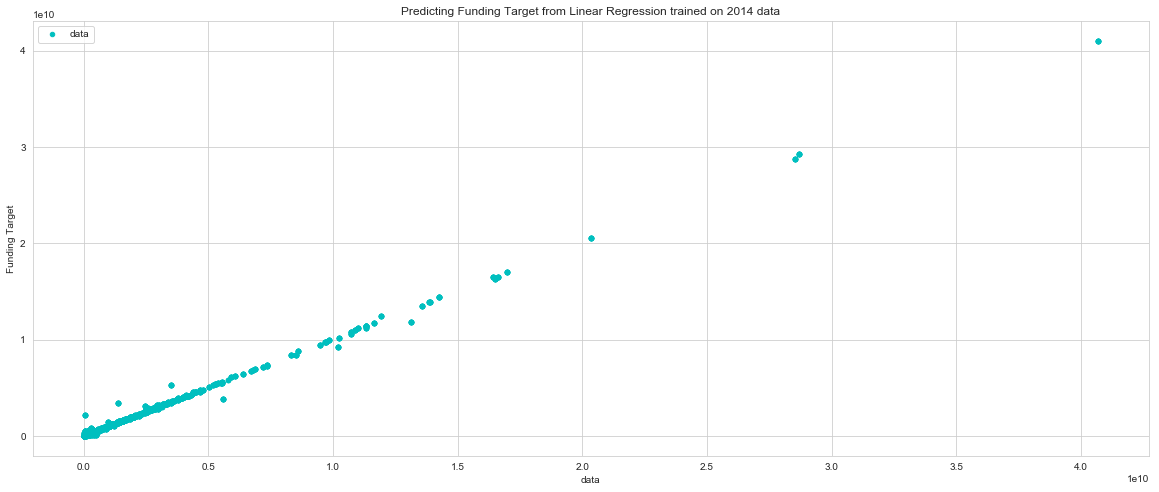

In [11]:
plot_results(y15,yhat15)

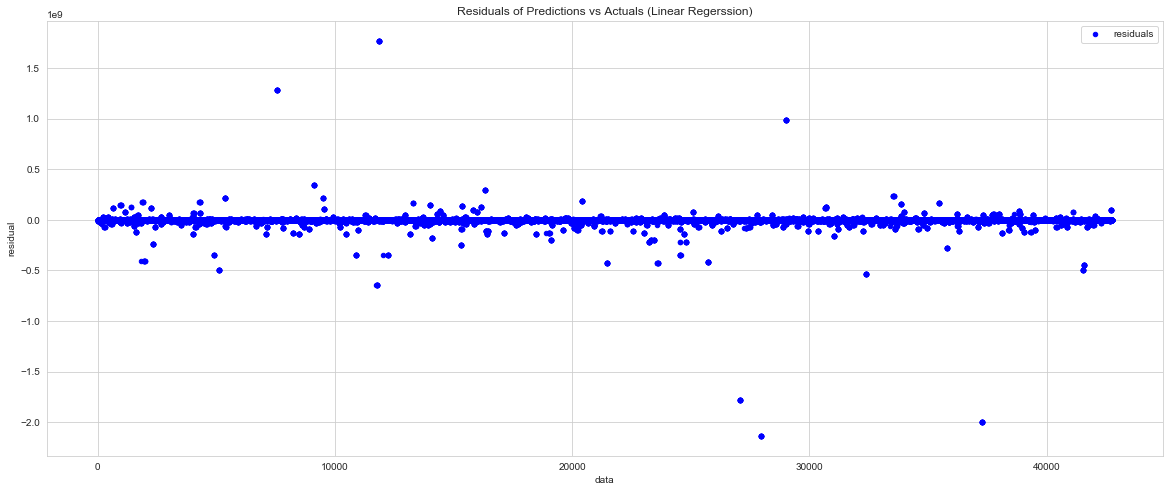

In [12]:
plot_residuals(y15, yhat15)

<h3>Residual Analysis</h3>

In [13]:
resid_15 = y15-yhat15
resid_15

0       -1.276001e+07
1       -2.462921e+06
2       -2.462921e+06
3       -2.462921e+06
4       -2.462921e+06
5       -2.462921e+06
6       -2.462921e+06
7       -2.462921e+06
8       -2.462921e+06
9       -2.462921e+06
10      -2.412357e+06
11      -2.412357e+06
12      -2.412357e+06
13      -2.412357e+06
14      -2.412357e+06
15      -2.412357e+06
16      -2.412357e+06
17      -2.412357e+06
18      -2.412357e+06
19      -6.801624e+06
20      -6.801624e+06
21      -6.801624e+06
22      -6.801624e+06
23      -6.801624e+06
24      -6.801624e+06
25      -6.801624e+06
26      -6.801624e+06
27      -6.801624e+06
28      -1.525705e+06
29      -1.525705e+06
             ...     
44118    7.676007e+05
44119    7.676007e+05
44120    7.676007e+05
44121    7.676007e+05
44132   -1.092526e+06
44133   -1.092526e+06
44134   -1.092526e+06
44135   -1.092526e+06
44136   -1.092526e+06
44137   -1.092526e+06
44138   -1.092526e+06
44139   -1.092526e+06
44140   -9.729800e+05
44141   -9.729800e+05
44142   -9

In [14]:
resid_15.describe()

count    4.276000e+04
mean    -4.693389e+06
std      6.727533e+07
min     -2.136638e+09
25%     -2.653974e+06
50%     -1.606650e+06
75%     -9.178465e+05
max      1.770387e+09
dtype: float64

In [32]:
year = 2015
prelim_df_15 = get_data(year)
df_15 = clean_data(prelim_df, year)

In [46]:
df_15

,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,type_pension_bnft_code,plan_name,sponsor_dfe_name,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual
0,131395076,1,6.35,1,356,13614705,942142.0,15030704.0,366.0,1A1G,TRANSPORT WORKERS UNION OF AMERICA AFLCIO LOCA...,TRANSPORT WORKERS UNION OF AMERICA LOCAL 100,617750.0,617750.0,2015,True,False,False,False,False
1,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1I3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
2,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1G3D3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,False,False,False
3,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1G1I3D3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
4,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1G1I3D3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
5,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1G1I3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
6,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1I3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
7,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1I3H,THE BROOKDALE UNIVERSITY HOSPITAL & MEDICAL CE...,THE BROOKDALE UNIVERSITY HOSPITAL & MEDICAL CE...,4845441.0,4845441.0,2015,True,False,True,False,False
8,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1I3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False
9,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,1A1I3H,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False


In [38]:
yhat15.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            44148, 44149, 44150, 44151, 44152, 44153, 44154, 44155, 44156,
            44157],
           dtype='int64', length=42760)

In [39]:
pd.DataFrame(yhat15).rename(columns={0:'Residual'})

,Residual
0,1.008861e+09
1,6.377360e+06
2,6.377360e+06
3,6.377360e+06
4,6.377360e+06
5,6.377360e+06
6,6.377360e+06
7,6.377360e+06
8,6.377360e+06
9,6.377360e+06


In [51]:
df_15_full = df_15.merge(pd.DataFrame(yhat15).rename(columns={0:'Predicted_FT_2016'}),on=df_15.index,right_index=True)
df_15_full
#df_15[(~df_15.col1.isin(common.col1))&(~df1.col2.isin(common.col2))]

,key_0,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,...,sponsor_dfe_name,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual,Predicted_FT_2016
0,0,131395076,1,6.35,1,356,13614705,942142.0,15030704.0,366.0,...,TRANSPORT WORKERS UNION OF AMERICA LOCAL 100,617750.0,617750.0,2015,True,False,False,False,False,1.008861e+09
1,1,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
2,2,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,False,False,False,6.377360e+06
3,3,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
4,4,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
5,5,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
6,6,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
7,7,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL & MEDICAL CE...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
8,8,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06
9,9,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,THE BROOKDALE UNIVERSITY HOSPITAL AND MEDICAL ...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06


In [52]:
df_15_full['Residual_16'] = df_15_full['fndng_tgt_2016'] - df_15_full['Predicted_FT_2016']

In [53]:
df_15_full

,key_0,ein,pn,eir,sb_plan_type_code,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,...,pmts_to_part_2015,tot_pmts_2015,data_year,pay_related,cash_bal,frozen,pbgc_takeover,not_qual,Predicted_FT_2016,Residual_16
0,0,131395076,1,6.35,1,356,13614705,942142.0,15030704.0,366.0,...,617750.0,617750.0,2015,True,False,False,False,False,1.008861e+09,-9.938303e+08
1,1,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
2,2,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,False,False,False,6.377360e+06,1.054580e+08
3,3,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
4,4,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
5,5,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
6,6,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
7,7,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
8,8,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08
9,9,111631746,1,6.25,1,1681,107445427,800000.0,111835318.0,1667.0,...,4845441.0,4845441.0,2015,True,False,True,False,False,6.377360e+06,1.054580e+08


In [79]:
df_15_full.describe()

,key_0,ein,pn,eir,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,fndng_tgt_2016,part_cnt_2016,pmts_to_part_2015,tot_pmts_2015,data_year,Predicted_FT_2016,Residual_16
count,42760.000000,4.276000e+04,42760.000000,42760.000000,42760.000000,4.276000e+04,4.276000e+04,4.276000e+04,42760.000000,4.276000e+04,4.276000e+04,42760.0,4.276000e+04,4.276000e+04
mean,22057.221188,4.128471e+08,9.899953,6.264384,4290.451964,2.982482e+08,6.645588e+06,3.047494e+08,4158.360664,2.557234e+07,2.699099e+07,2015.0,3.094428e+08,-4.693389e+06
std,12746.417385,2.649879e+08,37.585683,0.211663,15169.258102,1.359573e+09,3.281798e+07,1.390583e+09,14781.110153,1.414708e+08,1.497752e+08,0.0,1.398659e+09,1.949868e+09
min,0.000000,1.002024e+07,1.000000,3.580000,101.000000,1.402600e+05,0.000000e+00,1.473150e+05,46.000000,0.000000e+00,0.000000e+00,2015.0,-3.954503e+06,-4.103097e+10
25%,11012.750000,2.208047e+08,1.000000,6.210000,274.000000,1.194556e+07,1.150000e+05,1.222298e+07,268.000000,7.503600e+05,7.599300e+05,2015.0,1.364284e+07,-7.381533e+07
50%,22026.500000,3.638359e+08,2.000000,6.280000,710.000000,3.503804e+07,5.382440e+05,3.634730e+07,699.000000,2.391345e+06,2.418668e+06,2015.0,3.789652e+07,-1.215138e+06
75%,33097.250000,5.813499e+08,4.000000,6.350000,2412.000000,1.302219e+08,2.381813e+06,1.319967e+08,2353.000000,9.448652e+06,9.520941e+06,2015.0,1.353382e+08,7.211417e+07
max,44157.000000,9.903628e+08,461.000000,8.250000,294925.000000,4.088939e+10,9.189551e+08,4.069247e+10,287809.000000,5.318195e+09,5.318195e+09,2015.0,4.103642e+10,4.068576e+10


<h3>Graph of Predicted 2016 Funding Target vs Actual 2016 Funding Target<br>
All Plans</h3>

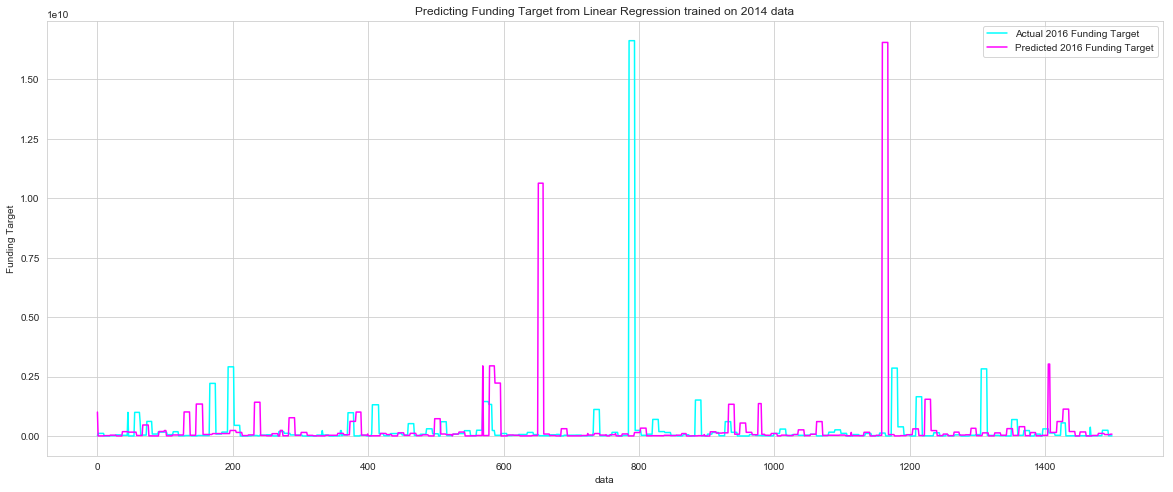

In [58]:
num_to_plot = 1500
y_true = df_15_full['fndng_tgt_2016'][0:num_to_plot-1]
y_pred = df_15_full['Predicted_FT_2016'][0:num_to_plot-1]
xx = np.linspace(0,num_to_plot-1,num_to_plot-1)
plt.figure(figsize=(20,8))
plt.plot(xx, y_true, color='cyan', label='Actual 2016 Funding Target')
plt.plot(xx, y_pred, color='magenta', label='Predicted 2016 Funding Target' )
#plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
plt.xlabel("data")
plt.ylabel("Funding Target")
plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
plt.legend()
plt.show()

<h3>Graph of Predicted 2016 Funding Target vs Actual 2016 Funding Target<br>
    Actual 2016 funding target < $5 M</h3>

In [72]:
y15.describe()

count    4.276000e+04
mean     3.047494e+08
std      1.390583e+09
min      1.473150e+05
25%      1.222298e+07
50%      3.634730e+07
75%      1.319967e+08
max      4.069247e+10
Name: fndng_tgt_2016, dtype: float64

In [76]:
len(y15[y15<5e6])

3439

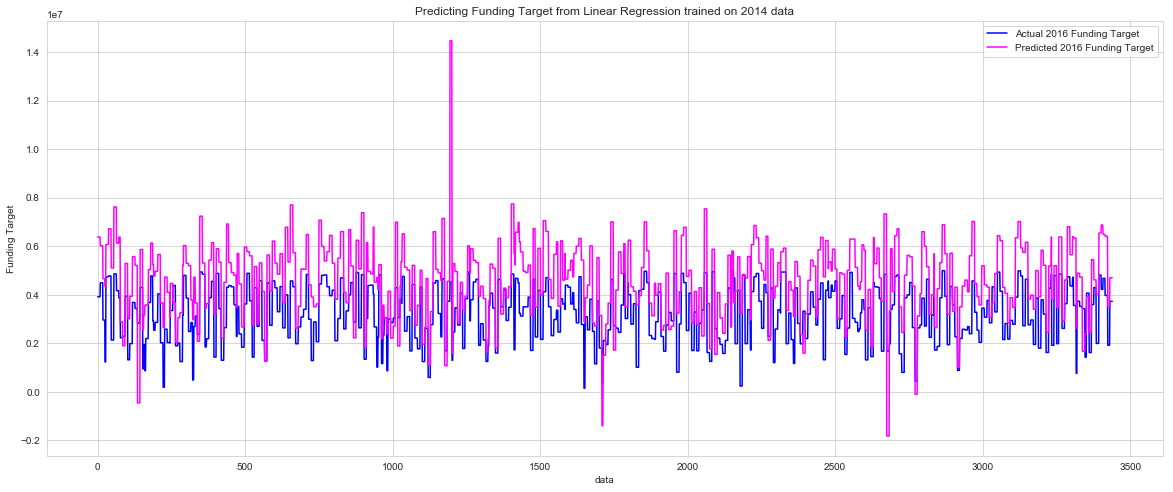

In [80]:
num_to_plot = len(y15[y15<5e6])
y_true = y15[y15<5e6]
y_pred = yhat15[y15<5e6]
xx = np.linspace(0,num_to_plot,num_to_plot)
plt.figure(figsize=(20,8))
plt.plot(xx, y_true, color='blue', label='Actual 2016 Funding Target')
plt.plot(xx, y_pred, color='magenta', label='Predicted 2016 Funding Target' )
#plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
plt.xlabel("data")
plt.ylabel("Funding Target")
plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
plt.legend()
plt.show()

In [78]:
df_15['part_cnt_2015'].describe()

count     42760.000000
mean       4290.451964
std       15169.258102
min         101.000000
25%         274.000000
50%         710.000000
75%        2412.000000
max      294925.000000
Name: part_cnt_2015, dtype: float64

In [ ]:
df_15

<h1>Slice Data by Plan Size</h1>

In [ ]:
X

In [ ]:
year=2014
X_small = X[X['fndng_tgt_{}'.format(year)] < X['fndng_tgt_{}'.format(year)].quantile(.5)]
X_big = X[X['fndng_tgt_{}'.format(year)] >= X['fndng_tgt_{}'.format(year)].quantile(.5)]
y_small = y[X['fndng_tgt_{}'.format(year)] < X['fndng_tgt_{}'.format(year)].quantile(.5)]
y_big = y[X['fndng_tgt_{}'.format(year)] >= X['fndng_tgt_{}'.format(year)].quantile(.5)]

In [ ]:
len(X), len(X_small), len(X_big)

<h1>Train Model on X_small (bottom half of 2014 data by 2014 plan size) & X_large</h1>

In [ ]:
summary_model(X_small, y_small)

In [ ]:
summary_model(X_big, y_big)